In [1]:
!pip install osmium

In [1]:
import ogr
import shapely
from shapely.geometry import *
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
driver=ogr.GetDriverByName('OSM')
data = driver.Open('bangladesh.osh')
layer = data.GetLayer('points')

features=[x for x in layer]
print(len(features))

6


In [4]:
data_list=[]
for feature in features:
    data=feature.ExportToJson(as_object=True)
    coords=data['geometry']['coordinates']
    shapely_geo=Point(coords[0],coords[1])
    name=data['properties']['name']
    highway=data['properties']['highway']
    other_tags=data['properties']['other_tags']
    if other_tags and 'amenity' in other_tags:
        feat=[x for x in other_tags.split(',') if 'amenity' in x][0]
        amenity=feat[feat.rfind('>')+2:feat.rfind('"')]
    else:
        amenity=None
    data_list.append([name,highway,amenity,shapely_geo])
gdf=gpd.GeoDataFrame(data_list,columns=['Name','Highway','Amenity','geometry'],crs={'init': 'epsg:4326'}).to_crs(epsg=3310)

In [5]:
gdf

,Name,Highway,Amenity,geometry
0,Zia Intl,None,None,POINT (-9874204.197 8383243.384)
1,American Club,None,pub,POINT (-9878631.704 8381939.735)
2,Gulshan Youth Club,None,None,POINT (-9879758.586 8381271.096)
3,Bagha Club,None,pub,POINT (-9879812.231 8381581.700)
4,German Club,None,pub,POINT (-9879595.137 8380981.329)
5,International School Dhaka,None,school,POINT (-9877733.183 8379785.788)


In [11]:
cafe_bar=gdf[gdf.Amenity.isin(['cafe','pub','bar'])]
cafe_bar.shape

(3, 4)

In [12]:
cafe_bar

,Name,Highway,Amenity,geometry
1,American Club,None,pub,POINT (-9878631.704 8381939.735)
3,Bagha Club,None,pub,POINT (-9879812.231 8381581.700)
4,German Club,None,pub,POINT (-9879595.137 8380981.329)


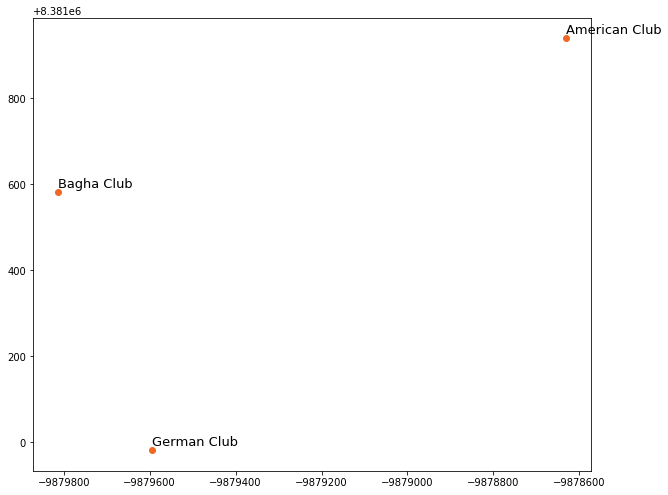

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
for i,row in cafe_bar.iterrows():
    x=row['geometry'].x
    y=row['geometry'].y
    plt.annotate(row['Name'], xy=(x,y), size=13, xytext=(0,5), textcoords='offset points')
    plt.plot(x,y,'o', color='#f16824')
    ax.set(aspect=1)